<span>
<b>Author:</b> <a href="http://pages.di.unipi.it/ruggieri/">Salvatore Ruggieri</a><br/>
<b>Python version:</b>  3.x<br/>
</span>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# gloabl imports
import sys
sys.path.append('src/') # path of project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

# local imports
import dd

<AxesSubplot:>

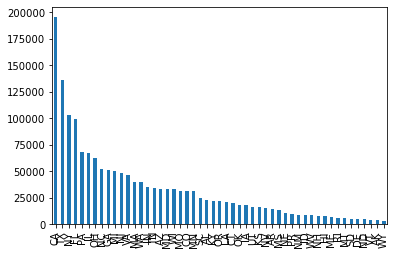

In [5]:
df = pd.read_pickle('df.pkl') 
# df = df[df['STATE'] in ['AL', 'CA', 'AK']]
states = list(df['STATE'].unique())
df["STATE"].value_counts().plot(kind='bar')

In [6]:
# there are no missing values
df.isna().sum()

AGEP     0
COW      0
SCHL     0
MAR      0
OCCP     0
POBP     0
WKHP     0
SEX      0
RAC1P    0
STATE    0
class    0
dtype: int64

In [7]:
df

,AGEP,COW,SCHL,MAR,OCCP,POBP,WKHP,SEX,RAC1P,STATE,class
0,16-30,Employee of a private for-profit company orbus...,"Some college, but less than 1 year",Never married or under 15 years old,SAL,US,11-20,Female,Black or African American alone,AL,False
1,51-60,Federal government employee,GED or alternative credential,Never married or under 15 years old,HLS,US,31-40,Male,White alone,AL,False
2,31-40,Employee of a private for-profit company orbus...,Regular high school diploma,Never married or under 15 years old,RPR,US,31-40,Male,White alone,AL,False
3,16-30,Self-employed in own not incorporated business...,"Some college, but less than 1 year",Never married or under 15 years old,ENT,US,0-10,Female,White alone,AL,False
4,16-30,Federal government employee,"1 or more years of college credit, no degree",Never married or under 15 years old,PRT,US,>40,Male,White alone,AL,False
...,...,...,...,...,...,...,...,...,...,...,...
1664495,31-40,Self-employed in own not incorporated business...,Regular high school diploma,Never married or under 15 years old,CON,US,11-20,Male,White alone,PR,False
1664496,31-40,Self-employed in own not incorporated business...,Grade 11,Never married or under 15 years old,CLN,US,31-40,Male,Some Other Race alone,PR,False
1664497,31-40,Employee of a private for-profit company orbus...,"1 or more years of college credit, no degree",Divorced,PRD,US,31-40,Female,Two or More Races,PR,False
1664498,41-50,Employee of a private for-profit company orbus...,Regular high school diploma,Married,PRD,US,31-40,Male,Some Other Race alone,PR,False


In [8]:
# DD(filename or dataframe, unprotected item, positives item)
disc = dd.DD(df, 'RAC1P=White alone', 'class=False')
# all protected vs unprotected
ctg = disc.ctg_any()
disc.print(ctg)
print("RD = {:f}".format(ctg.rd()))
# each protected vs unprotected
for ctg in disc.ctg_global():
    disc.print(ctg)
    print("RD = {:f}".format(ctg.rd()))

-----
Context = ALL
Size = 1664500  Perc = 100.00%
                  |class=False|class=True|       
RAC1P!=White alone|     259271|    107103| 366374
RAC1P=White alone |     791162|    506964|1298126
                  |    1050433|    614067|1664500
RD = 0.098203
-----
Context = ALL
Size = 1664500  Perc = 100.00%
                                     |class=False|class=True|       
RAC1P=Black or African American alone|     111233|     36340| 147573
RAC1P=White alone                    |     791162|    506964|1298126
                                     |     902395|    543304|1445699
RD = 0.144284
-----
Context = ALL
Size = 1664500  Perc = 100.00%
                       |class=False|class=True|       
RAC1P=Two or More Races|      29545|     12270|  41815
RAC1P=White alone      |     791162|    506964|1298126
                       |     820707|    519234|1339941
RD = 0.097100
-----
Context = ALL
Size = 1664500  Perc = 100.00%
                 |class=False|class=True|       
RAC1P=Asi

In [9]:
# filtering condition: return None to filter out, or measure value
# contingency table ctg such that ctg.n() >= minSupp 
'''
     contingency table for independence
     =========== positives === negatives === 
     protected       a            b       n1()
     unprotected     c            d       n2()
     ===========    m1()  ===    m2()  ==  n()
'''
def check_rd(ctg):
    # at least 20 protected with pred.pos and p2() > 0
    if ctg.a < 20 or ctg.c==0:
        return None
    return ctg.rd()

def check_rr(ctg):
    # at least 20 protected with pred.pos and p2() > 0
    if ctg.a < 20 or ctg.c==0:
        return None
    return ctg.rr()

In [10]:
# Extract contingency tables: 
# minSupp = min support of context (negative = absolute, positive = percentage)
# topk = top k contingency tables
ctgs_rd = disc.extract(testCond=check_rd, minSupp=-500, topk=1000)

In [11]:
# top 3 wrt RD
for v, ctg in ctgs_rd[:3]:
    disc.print(ctg)
    print("RD = {:f}".format(v))

-----
Context = STATE=MN AND SCHL=Bachelor's degree AND WKHP=31-40 AND SEX=Male AND MAR=Married
Size = 995  Perc = 0.06%
                                     |class=False|class=True|   
RAC1P=Black or African American alone|         24|         2| 26
RAC1P=White alone                    |        267|       647|914
                                     |        291|       649|940
RD = 0.630954
-----
Context = STATE=LA AND WKHP=>40 AND SEX=Male AND MAR=Married AND COW=Employee of a private for-profit company orbusiness, or of an individual, for wages,salary, or commissions
Size = 1714  Perc = 0.10%
                           |class=False|class=True|    
RAC1P=Some Other Race alone|         20|         3|  23
RAC1P=White alone          |        354|      1101|1455
                           |        374|      1104|1478
RD = 0.626266
-----
Context = COW=Local government employee (city, county, etc.) AND SCHL=1 or more years of college credit, no degree AND AGEP=51-60 AND SEX=Male AND MAR=Ma

In [12]:
# top 3 wrt RR
ctgs_rr = disc.extract(testCond=check_rr, minSupp=-500, topk=1000)
for v, ctg in ctgs_rr[:3]:
    disc.print(ctg)
    print("RR = {:f}".format(v))

-----
Context = SCHL=Master's degree AND WKHP=>40 AND SEX=Male AND MAR=Married AND COW=Employee of a private for-profit company orbusiness, or of an individual, for wages,salary, or commissions
Size = 13853  Perc = 0.83%
                           |class=False|class=True|     
RAC1P=Some Other Race alone|         28|        70|   98
RAC1P=White alone          |        658|     10937|11595
                           |        686|     11007|11693
RR = 5.034737
-----
Context = POBP=Asia AND OCCP=MED AND AGEP=41-50 AND SEX=Male
Size = 744  Perc = 0.04%
                 |class=False|class=True|   
RAC1P=Asian alone|        107|       527|634
RAC1P=White alone|          3|        86| 89
                 |        110|       613|723
RR = 5.006835
-----
Context = STATE=MA AND AGEP=41-50 AND WKHP=>40 AND MAR=Married AND COW=Employee of a private for-profit company orbusiness, or of an individual, for wages,salary, or commissions
Size = 1208  Perc = 0.07%
                           |class=False|c

In [13]:
# contingency tables in ctgs_rd
ct_rd_set = set(ctg[1] for ctg in ctgs_rd)
# contingency tables in ctgs_rd
ct_rr_set = set(ctg[1] for ctg in ctgs_rr)
# contingency tables in both
shared = ct_rd_set & ct_rr_set
len(shared) 

282

Text(0, 0.5, 'p2')

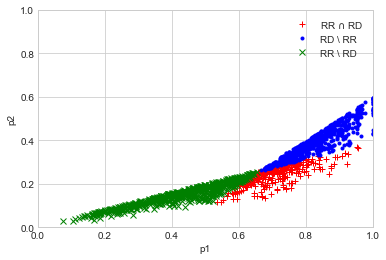

In [14]:
# plot p1() vs p2()
plt.style.use('seaborn-whitegrid')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([ctg.p1() for ctg in shared], [ctg.p2() for ctg in shared], '+', color='red', label=r'RR $\cap$ RD')
only_rd = ct_rd_set - shared
plt.plot([ctg.p1() for ctg in only_rd], [ctg.p2() for ctg in only_rd], '.', color='blue', label=r'RD \ RR')
only_rr = ct_rr_set - shared
plt.plot([ctg.p1() for ctg in only_rr], [ctg.p2() for ctg in only_rr], 'x', color='green', label=r'RR \ RD')
plt.legend()
plt.xlabel('p1')
plt.ylabel('p2')

In [16]:
# sequential covering algorithm: 10 contingency tables
covers, residuals, times, uncovered, ctg, ctg_rem = disc.cover_n(ct_rd_set, check_rd, 10)
print('Total protected:', sum(residuals)+len(uncovered))
print('Total protected covered:', sum(residuals))
print('% covered: {:.2f}%'.format(100*sum(residuals)/(sum(residuals)+len(uncovered))))
# OR's of covering contexts and any protected
disc.print(ctg)
print("RD = {:f}".format(ctg.rd()))
# complement of previous contingency table
disc.print(ctg_rem)
print("RD = {:f}".format(ctg_rem.rd()))
# Cover contingency tables
sum_rd = cnt_rd = i = 0
for ctg, res in zip(covers, residuals):
    print('-----\nCT', i, 'covered', res)
    i += 1
    disc.print(ctg)
    print("RD = {:f}".format(ctg.rd()))
    sum_rd += ctg.rd()*ctg.n1()
    cnt_rd += ctg.n1()
print('-----\nAverage RD = {:f}'.format(sum_rd/cnt_rd))

Total protected: 366374
Total protected covered: 271
% covered: 0.07%
-----
Context = <extensional>
Size = 15665  Perc = 0.94%
                  |class=False|class=True|     
RAC1P!=White alone|       1210|      1268| 2478
RAC1P=White alone |       3923|      9264|13187
                  |       5133|     10532|15665
RD = 0.190807
-----
Context = <extensional>
Size = 1648835  Perc = 99.06%
                  |class=False|class=True|       
RAC1P!=White alone|     258061|    105835| 363896
RAC1P=White alone |     787239|    497700|1284939
                  |    1045300|    603535|1648835
RD = 0.096495
-----
CT 0 covered 26
-----
Context = STATE=MN AND SCHL=Bachelor's degree AND WKHP=31-40 AND SEX=Male AND MAR=Married
Size = 995  Perc = 0.06%
                                     |class=False|class=True|   
RAC1P=Black or African American alone|         24|         2| 26
RAC1P=White alone                    |        267|       647|914
                                     |        291|     

In [17]:
# Encode categorical values
adult = df
df, encoders = dd.encode(adult)
df.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,WKHP,SEX,RAC1P,STATE,class
0,0.0,0.0,23.0,2.0,22.0,5.0,1.0,0.0,4.0,1.0,0.0
1,3.0,2.0,5.0,2.0,12.0,5.0,3.0,1.0,8.0,1.0,0.0
2,1.0,0.0,22.0,2.0,21.0,5.0,3.0,1.0,8.0,1.0,0.0
3,0.0,5.0,23.0,2.0,8.0,5.0,0.0,0.0,8.0,1.0,0.0
4,0.0,2.0,0.0,2.0,20.0,5.0,4.0,1.0,8.0,1.0,0.0


In [18]:
# 0 = negative, 1 = positive
encoders['class'].classes_

array([False,  True])

In [19]:
# split train test
X = df[df.columns.drop('class')]
y = df['class'].astype(int)
X_train, X_test, y_train, y_test, adult_train, adult_test = train_test_split(X, y, adult.copy(), test_size=0.33, random_state=42)

In [20]:
# training model and make predictions 
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
# add predicted class in the adult_test (decoding back)
adult_test['pred_b'] = encoders['class'].inverse_transform(clf.predict(X_test))
# add predicted score in the adult_test
adult_test['score'] = clf.predict_proba(X_test)[:,1]
adult_test.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,WKHP,SEX,RAC1P,STATE,class,pred_b,score
517717,16-30,Employee of a private for-profit company orbus...,"Some college, but less than 1 year",Never married or under 15 years old,SAL,US,>40,Female,White alone,IL,False,False,0.118837
319156,51-60,Federal government employee,"Some college, but less than 1 year",Divorced,CLN,US,31-40,Male,Black or African American alone,CT,False,False,0.439936
507501,16-30,Employee of a private for-profit company orbus...,Bachelor's degree,Never married or under 15 years old,ENG,US,31-40,Male,White alone,IL,True,True,0.634362
537835,31-40,Employee of a private for-profit company orbus...,Bachelor's degree,Married,SAL,US,>40,Female,White alone,IL,True,True,0.789527
305930,31-40,Employee of a private for-profit company orbus...,Doctorate degree,Married,MED,US,31-40,Female,White alone,CT,True,True,0.904044


In [21]:
# discrimination in overall test set
atts = list(set(adult_test.columns)-set(['score', 'pred_b'])) # do not use score in contexts
# DD(filename or dataframe, unprotected item, negative decision, negative truth)
disc_b = dd.DD(adult_test[atts+['pred_b']], 'RAC1P=White alone', 'pred_b=False', 'class=False', na_values={'nan'}) 
# all protected vs unprotected
ctg = disc_b.ctg_any()
disc_b.print(ctg)
print("TNR White = {:f}".format(ctg.tnru()))
print("TNR NonWhite = {:f}".format(ctg.tnrp()))
print("tnr_diff = {:f}".format(ctg.tnr_diff())) # Equality of opportunity
for ctg in disc_b.ctg_global():
    disc_b.print(ctg)
    print("TNR White = {:f}".format(ctg.tnru()))
    print("TNR NonWhite = {:f}".format(ctg.tnrp()))
    print("tnr_diff = {:f}".format(ctg.tnr_diff())) # Equality of opportunity

-----
Context = ALL
Size = 549285  Perc = 100.00%
RAC1P!=White alone                               RAC1P=White alone
           |pred_b=False|pred_b=True|                      |pred_b=False|pred_b=True|      
class=False|       77763|       7686| 85449     class=False|      221578|      39919|261497
class=True |       12899|      22537| 35436     class=True |       45516|     121387|166903
           |       90662|      30223|120885                |      161306|     267094|428400
TNR White = 0.727291
TNR NonWhite = 0.635992
tnr_diff = 0.091299
-----
Context = ALL
Size = 549285  Perc = 100.00%
RAC1P=Black or African American alone           RAC1P=White alone
           |pred_b=False|pred_b=True|                      |pred_b=False|pred_b=True|      
class=False|       33831|       2737| 36568     class=False|      221578|      39919|261497
class=True |        5549|       6402| 11951     class=True |       45516|     121387|166903
           |       39380|       9139| 48519               

In [22]:
# filtering condition: return None to filter out, or measure value
# contingency table ctg such that ctg.n() >= minSupp 
'''
     contingency table for separation
          protected                                   unprotected
     ========= pred.pos  ==  pred.neg  ===     ====  pred.pos  ==  pred.neg  === 
     true.pos    TPp          FNp      Pp()           TPu           FNu      Pu()
     true.neg    FPp          TNp      Np()           FPu           TNu      Nu()
     ==========   a     =====  b  ===  n1()   ====     c    ====     d  ===  n2()
'''
def check_eop(ctg): # 
    # at least 20 protected and at least 20 unprotected and tnrp() defined and tnru() defined
    if ctg.Nu() < 20 or ctg.Np() < 20 or ctg.Np()==0 or ctg.Nu()==0:
        return None
    return ctg.tnr_diff() # Equality of opportunity

In [29]:
# Extract contingency tables: 
ctgs_eop_b = disc_b.extract(testCond=check_eop, minSupp=-500, topk=10000)

In [30]:
# output top 3
for v, ctg in ctgs_eop_b[:3]:
    disc_b.print(ctg)
    print("TNR White = {:f}".format(ctg.tnru()))
    print("TNR NonWhite = {:f}".format(ctg.tnrp()))
    print("tnr_diff = {:f}".format(v)) # Equality of opportunity

-----
Context = OCCP=TRN AND SCHL=Regular high school diploma AND WKHP=>40 AND class=True AND SEX=Male AND MAR=Married AND COW=Employee of a private for-profit company orbusiness, or of an individual, for wages,salary, or commissions
Size = 1065  Perc = 0.19%
RAC1P=Some Other Race alone                  RAC1P=White alone
           |pred_b=False|pred_b=True|                   |pred_b=False|pred_b=True|   
class=False|           0|          0|  0     class=False|           0|          0|  0
class=True |          25|          1| 26     class=True |         148|        791|939
           |          25|          1| 26                |         791|        148|939
TNR White = 0.842386
TNR NonWhite = 0.038462
tnr_diff = 0.803924
-----
Context = OCCP=TRN AND SCHL=Regular high school diploma AND WKHP=>40 AND SEX=Male AND MAR=Married AND COW=Employee of a private for-profit company orbusiness, or of an individual, for wages,salary, or commissions
Size = 2019  Perc = 0.37%
RAC1P=Some Other Race a

In [31]:
# sequential covering algorithm: 10 contingency tables
covers, residuals, times, uncovered, ctg, ctg_rem = disc_b.cover_n([ctg for _,ctg in ctgs_eop], check_eop, 10)
print('Total protected:', sum(residuals)+len(uncovered))
print('Total protected covered:', sum(residuals))
print('% covered: {:.2f}%'.format(100*sum(residuals)/(sum(residuals)+len(uncovered))))
# OR's of covering contexts and any protected
disc_b.print(ctg)
print("tnr_diff = {:f}".format(ctg.tnr_diff()))
# complement of previous contingency table
disc_b.print(ctg_rem)
print("tnr_diff = {:f}".format(ctg_rem.tnr_diff()))
# Cover contingency tables
sum_rd = cnt_rd = i = 0
for ctg, res in zip(covers, residuals):
    print('-----\nCT', i, 'covered', res)
    i += 1
    disc_b.print(ctg)
    print("TNR White = {:f}".format(ctg.tnru()))
    print("TNR NonWhite = {:f}".format(ctg.tnrp()))
    print("tnr_diff = {:f}".format(ctg.tnr_diff())) # Equality of opportunity
    sum_rd += ctg.tnr_diff()*ctg.n1()
    cnt_rd += ctg.n1()
print('-----\nAverage tnr_diff = {:f}'.format(sum_rd/cnt_rd))

Total protected: 123525
Total protected covered: 4120
% covered: 3.34%
-----
Context = <extensional>
Size = 7190  Perc = 1.31%
RAC1P!=White alone                             RAC1P=White alone
           |pred_b=False|pred_b=True|                    |pred_b=False|pred_b=True|    
class=False|        1496|        209|1705     class=False|        2278|        494|2772
class=True |         288|        515| 803     class=True |         599|       1311|1910
           |        1784|        724|2508                |        1805|       2877|4682
tnr_diff = 0.045042
-----
Context = <extensional>
Size = 542095  Perc = 98.69%
RAC1P!=White alone                               RAC1P=White alone
           |pred_b=False|pred_b=True|                      |pred_b=False|pred_b=True|      
class=False|       76267|       7477| 83744     class=False|      219300|      39425|258725
class=True |       12611|      22022| 34633     class=True |       44917|     120076|164993
           |       88878|      294

In [32]:
# Fairlearn algorithms and utils (https://github.com/fairlearn/fairlearn)
# or try your preferred fair ML tool
from fairlearn.postprocessing import ThresholdOptimizer
# fairness by post-processing
postprocess_est = ThresholdOptimizer(estimator=clf, constraints="true_positive_rate_parity", prefit=True, predict_method='predict')
X_train = X_train.fillna(0) # fairlearn does not manage missing values
X_test = X_test.fillna(0) # fairlearn does not manage missing values
postprocess_est.fit(X_train, y_train, sensitive_features=X_train['RAC1P'])
# fair-corrected predictions 
adult_test['pred_a'] = encoders['class'].inverse_transform(
                            postprocess_est.predict(X_test, sensitive_features=X_test['RAC1P']).astype(int))

In [34]:
# discrimination in overall test set
# DD(filename or dataframe, unprotected item, negative decision, negative truth)
disc_a = dd.DD(adult_test[atts+['pred_a']], 'RAC1P=White alone', 'pred_a=False', 'class=False', na_values={'nan'}) 
# all protected vs unprotected
ctg = disc_a.ctg_any()
disc_a.print(ctg)
print("TNR White = {:f}".format(ctg.tnru()))
print("TNR NonWhite = {:f}".format(ctg.tnrp()))
print("tnr_diff = {:f}".format(ctg.tnr_diff())) # Equality of opportunity
for ctg in disc_a.ctg_global():
    disc_a.print(ctg)
    print("TNR White = {:f}".format(ctg.tnru()))
    print("TNR NonWhite = {:f}".format(ctg.tnrp()))
    print("tnr_diff = {:f}".format(ctg.tnr_diff())) # Equality of opportunity

-----
Context = ALL
Size = 549285  Perc = 100.00%
RAC1P!=White alone                               RAC1P=White alone
           |pred_a=False|pred_a=True|                      |pred_a=False|pred_a=True|      
class=False|       51574|      33875| 85449     class=False|      221594|      39903|261497
class=True |        9898|      25538| 35436     class=True |       45573|     121330|166903
           |       61472|      59413|120885                |      161233|     267167|428400
TNR White = 0.726949
TNR NonWhite = 0.720680
tnr_diff = 0.006270
-----
Context = ALL
Size = 549285  Perc = 100.00%
RAC1P=Black or African American alone           RAC1P=White alone
           |pred_a=False|pred_a=True|                      |pred_a=False|pred_a=True|      
class=False|       20161|      16407| 36568     class=False|      221594|      39903|261497
class=True |        3330|       8621| 11951     class=True |       45573|     121330|166903
           |       23491|      25028| 48519               

In [35]:
# Extract contingency tables: 
ctgs_eop_a = disc_a.extract(testCond=check_eop, minSupp=-500, topk=1000)

In [36]:
# output top 3
for v, ctg in ctgs_eop_a[:3]:
    disc_a.print(ctg)
    print("TNR White = {:f}".format(ctg.tnru()))
    print("TNR NonWhite = {:f}".format(ctg.tnrp()))
    print("tnr_diff = {:f}".format(v)) # Equality of opportunity

-----
Context = OCCP=PRD AND SCHL=Regular high school diploma AND WKHP=>40 AND MAR=Married
Size = 1916  Perc = 0.35%
RAC1P=Asian alone                            RAC1P=White alone
           |pred_a=False|pred_a=True|                    |pred_a=False|pred_a=True|    
class=False|          47|          3|  50     class=False|         339|        401| 740
class=True |          22|          0|  22     class=True |         184|        719| 903
           |          69|          3|  72                |        1120|        523|1643
TNR White = 0.796235
TNR NonWhite = 0.000000
tnr_diff = 0.796235
-----
Context = OCCP=PRD AND SCHL=Regular high school diploma AND WKHP=>40 AND class=True AND MAR=Married
Size = 995  Perc = 0.18%
RAC1P=Asian alone                            RAC1P=White alone
           |pred_a=False|pred_a=True|                   |pred_a=False|pred_a=True|   
class=False|           0|          0|  0     class=False|           0|          0|  0
class=True |          22|          0|

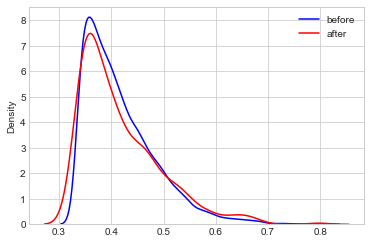

In [37]:
sns.set_style('whitegrid')
sns.kdeplot(np.array([v for v, _ in ctgs_eop_b]), bw_adjust=1.0, color='b')
sns.kdeplot(np.array([v for v, _ in ctgs_eop_a]), bw_adjust=1.0, color='r')
plt.legend(labels=['before', 'after'])

In [39]:
# sequential covering algorithm: 10 contingency tables
covers, residuals, times, uncovered, ctg, ctg_rem = disc_a.cover_n([ctg for _,ctg in ctgs_eop_a], check_eop, 10)
print('Total protected:', sum(residuals)+len(uncovered))
print('Total protected covered:', sum(residuals))
print('% covered: {:.2f}%'.format(100*sum(residuals)/(sum(residuals)+len(uncovered))))
# OR's of covering contexts and any protected
disc_a.print(ctg)
print("tnr_diff = {:f}".format(ctg.tnr_diff()))
# complement of previous contingency table
disc_a.print(ctg_rem)
print("tnr_diff = {:f}".format(ctg_rem.tnr_diff()))
# Cover contingency tables
sum_rd = cnt_rd = i = 0
for ctg, res in zip(covers, residuals):
    print('-----\nCT', i, 'covered', res)
    i += 1
    disc_a.print(ctg)
    print("TNR White = {:f}".format(ctg.tnru()))
    print("TNR NonWhite = {:f}".format(ctg.tnrp()))
    print("tnr_diff = {:f}".format(ctg.tnr_diff())) # Equality of opportunity
    sum_rd += ctg.tnr_diff()*ctg.n1()
    cnt_rd += ctg.n1()
print('-----\nAverage tnr_diff = {:f}'.format(sum_rd/cnt_rd))

Total protected: 120885
Total protected covered: 710
% covered: 0.59%
-----
Context = <extensional>
Size = 11505  Perc = 2.09%
RAC1P!=White alone                             RAC1P=White alone
           |pred_a=False|pred_a=True|                     |pred_a=False|pred_a=True|     
class=False|         716|        338| 1054     class=False|        1813|       1037| 2850
class=True |         533|        493| 1026     class=True |        1633|       4942| 6575
           |        1249|        831| 2080                |        5979|       3446| 9425
tnr_diff = 0.271128
-----
Context = <extensional>
Size = 537780  Perc = 97.91%
RAC1P!=White alone                               RAC1P=White alone
           |pred_a=False|pred_a=True|                      |pred_a=False|pred_a=True|      
class=False|       50858|      33537| 84395     class=False|      219781|      38866|258647
class=True |        9365|      25045| 34410     class=True |       43940|     116388|160328
           |       60223| 

In [ ]:
for s in states:
    ctg = disc_b.ctg_any(['STATE='+s])
    print('State before', s)
    disc_b.print(ctg)
    print("tnr_diff = {:f}".format(ctg.tnr_diff()))
    ctg = disc_a.ctg_any(['STATE='+s])
    print('State after', s)
    disc_a.print(ctg)
    print("tnr_diff = {:f}".format(ctg.tnr_diff()))    

In [ ]:
for _, ctg_a in ctgs_eop_post[:5]:
    ctg_b = disc_b.ctg_rel(ctg_a)
    print('Before')
    disc_b.print(ctg_b)
    print("tnr_diff = {:f}".format(ctg_b.tnr_diff()))
    print('After')
    ctg_a = disc_a.ctg_rel(ctg_a)
    disc_a.print(ctg_a)
    print("tnr_diff = {:f}".format(ctg_a.tnr_diff()))    

In [65]:
ctgs_states = [ (1, disc_b.ctg_any(['STATE='+s])) for s in states]
ctgs_states = [ (1, ctg) for s in states for ctg in disc_b.ctg_global(['STATE='+s])]

In [66]:
xs = []
ys = []
for _, ctg_a in ctgs_states:
    ctg_b = disc_b.ctg_rel(ctg_a)
    if ctg_b.Np()==0:
        continue
    xs.append(ctg_b.tnr_diff())
    ctg_a = disc_a.ctg_rel(ctg_a)
    ys.append(ctg_a.tnr_diff())

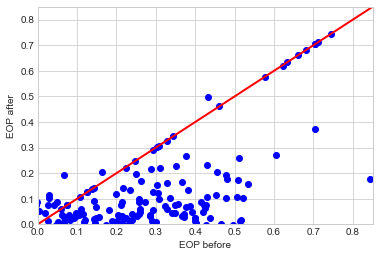

In [71]:
plt.scatter(xs, ys, c ="blue", linewidths = 1, marker ="o")
plt.xlabel("EOP before")
plt.ylabel("EOP after")
plt.xlim([0, .85])
plt.ylim([0, .85])
plt.axline((0, 0), (1, 1), linewidth=2, color='r')
plt.show()